# **BAR CHARTS**

#### IMPORT REQUIRED LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import sqlite3

CONNECT DATABASE AND LOAD DATASET

In [2]:
# Connect Database
conn = sqlite3.connect('my_analysis.db')

# Load Datasest
query = "SELECT * FROM main"
df = pd.read_sql_query(query, conn)

# Check head
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,None,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,None,None,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",None,Apples,None,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",None,Apples,None,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


---

#### VISUALIZING DATA DISTRIBUTION

Histogram of `ConvertedCompYearly`

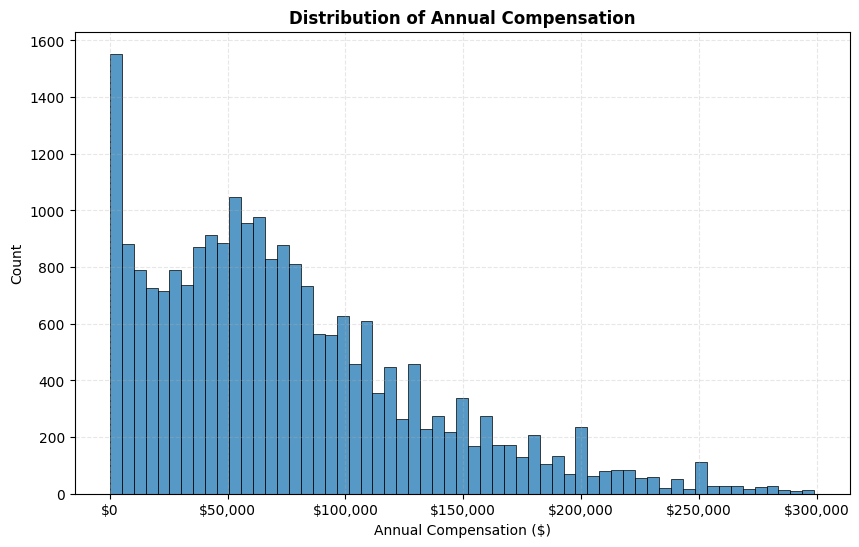

In [3]:
comp_data = df[df['ConvertedCompYearly'] < 300000][['ConvertedCompYearly']].dropna().copy()

# Histogram
plt.figure(figsize=(10,6))
sns.histplot(comp_data, x='ConvertedCompYearly', color='tab:blue', linewidth=0.5, edgecolor='black')

plt.title("Distribution of Annual Compensation", fontsize=12, weight='bold')
plt.xlabel("Annual Compensation ($)")
plt.grid(True, linestyle='--', alpha=0.3)

# Set xticks
plt.gca().xaxis.set_major_formatter(mticker.StrMethodFormatter("${x:,.0f}"))

plt.show()

Box Plot of `Age`

In [4]:
# Convert Age column to numerical
age_map = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5, 
    '35-44 years old': 39.5, 
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 65
}
age_order = ['Under 18 years old','18-24 years old','25-34 years old',
             '35-44 years old', '45-54 years old','55-64 years old',
             '65 years or older']

# Convert Age column to categorical
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

# Create numerical age column
df['Num_Age'] = df['Age'].map(age_map)

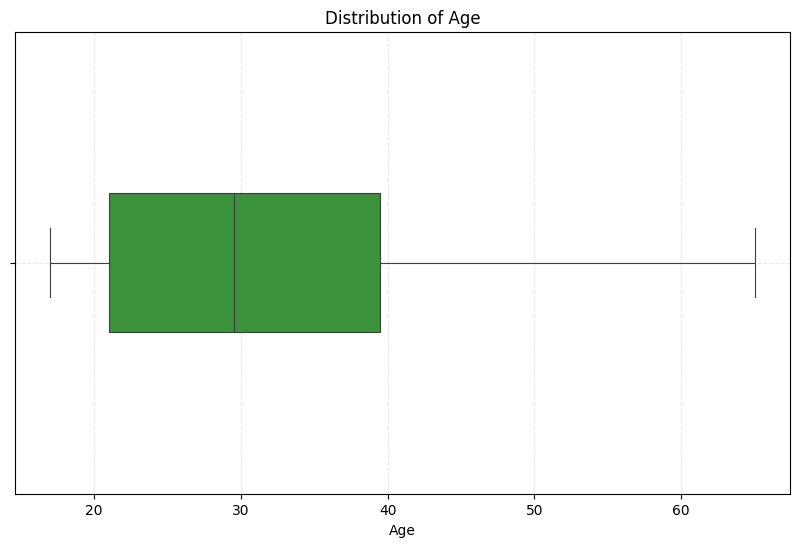

In [5]:
# Select Data
age_data = df[['Num_Age']].dropna().copy()

# Box Plot
plt.figure(figsize=(10,6))
sns.boxplot(age_data, x='Num_Age', linewidth=0.8, color='tab:green', width=0.3)

plt.title("Distribution of Age")
plt.xlabel('Age')

plt.grid(True, linestyle='--', alpha=0.3)

plt.show()

---

#### VISUALIZING RELATIONSHIP IN DATA

Scatter Plot of `Num_Age` and `ConvertedCompYearly`

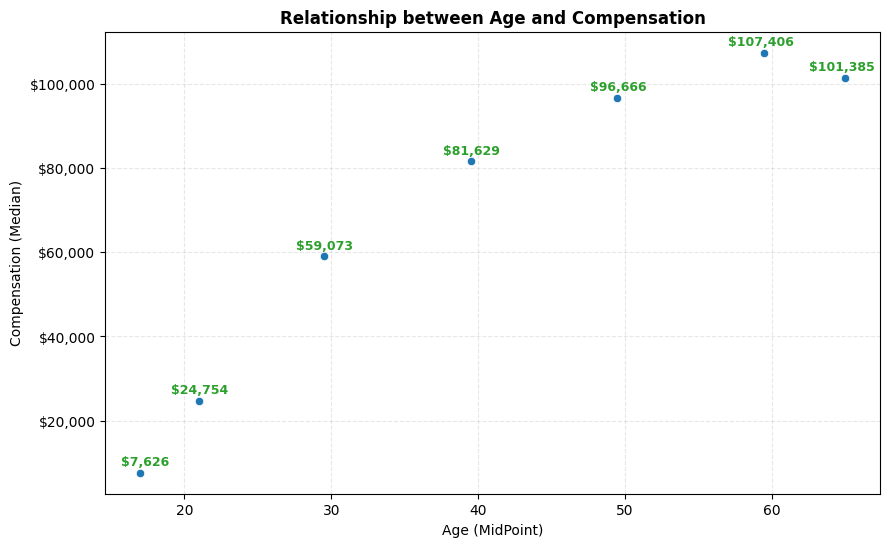

In [6]:
# Select Data
comp_age = df[df['ConvertedCompYearly'] < 300000][['Num_Age', 'ConvertedCompYearly']].dropna().copy()

# Aggregation
median_comp = comp_age.groupby('Num_Age', observed=True)['ConvertedCompYearly'].median().reset_index()

# Scatter Plot
plt.figure(figsize=(10,6))
sns.scatterplot(median_comp, x='Num_Age', y='ConvertedCompYearly', color='tab:blue')

plt.title("Relationship between Age and Compensation", fontsize=12, weight='bold')
plt.xlabel("Age (MidPoint)")
plt.ylabel("Compensation (Median)")
plt.grid(True, linestyle='--', alpha=0.3)

# Set yticks
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter("${x:,.0f}"))

# Add text
for i in range(len(median_comp)):
    plt.text(
        median_comp.Num_Age.iloc[i]+2,
        median_comp.ConvertedCompYearly.iloc[i] + 1000,
        f"${median_comp.ConvertedCompYearly.iloc[i]:,.0f}",
        va='bottom', ha='right', color='tab:green', weight='bold', fontsize=9
    )

plt.show()

Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Num_Age` as Bubble Size

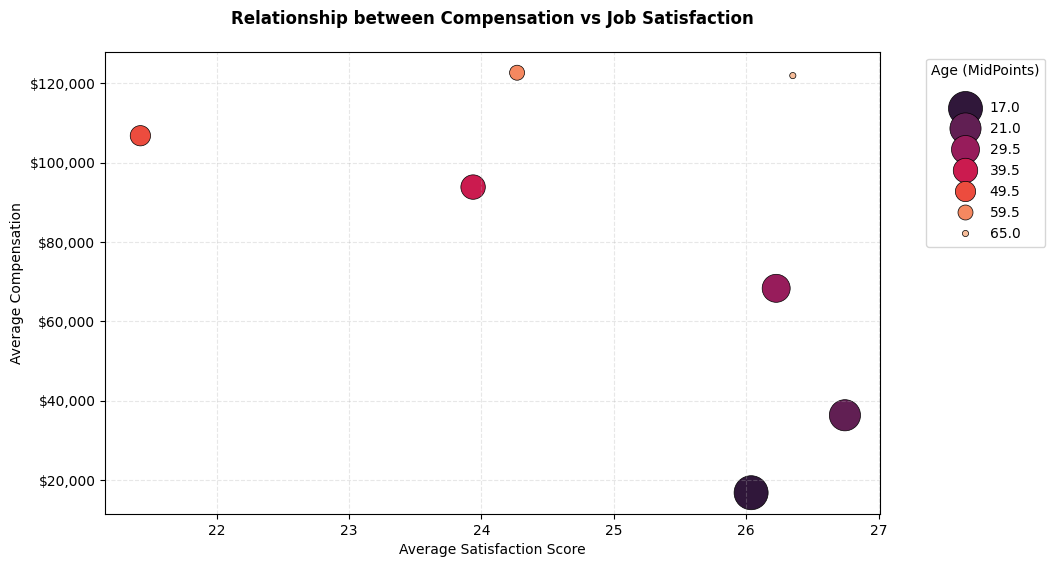

In [7]:
# Select Data
comp_sat_age = df[df['ConvertedCompYearly'] < 300000][['ConvertedCompYearly', 'JobSatPoints_6', 'Num_Age']].dropna().copy()

# Aggregate
grouped = comp_sat_age.groupby('Num_Age', observed=True).agg(
    avg_comp = ('ConvertedCompYearly', 'mean'),
    avg_sat = ('JobSatPoints_6', 'mean'),
    age_count = ('Num_Age', 'count')
).reset_index()

# Bubble Plot
plt.figure(figsize=(10,6))
ax = sns.scatterplot(grouped, x='avg_sat', y='avg_comp', size='Num_Age', 
                sizes=(20,600), hue='Num_Age', palette='rocket',
                edgecolor='black', linewidth=0.5)

plt.title("Relationship between Compensation vs Job Satisfaction", fontsize=12, weight='bold', pad=20)
plt.xlabel("Average Satisfaction Score")
plt.ylabel("Average Compensation")
plt.grid(True, linestyle='--', alpha=0.3)

# Set yticks
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter("${x:,.0f}"))

# Move Legend outside
sns.move_legend(ax, bbox_to_anchor=(1.05, 1), loc='upper left', title="Age (MidPoints)\n")

plt.show()

---

#### VISUALIZING COMPOSITION OF DATA WITH BAR CHARTS

Horizontal Bar Chart of `MainBranch` Distribution

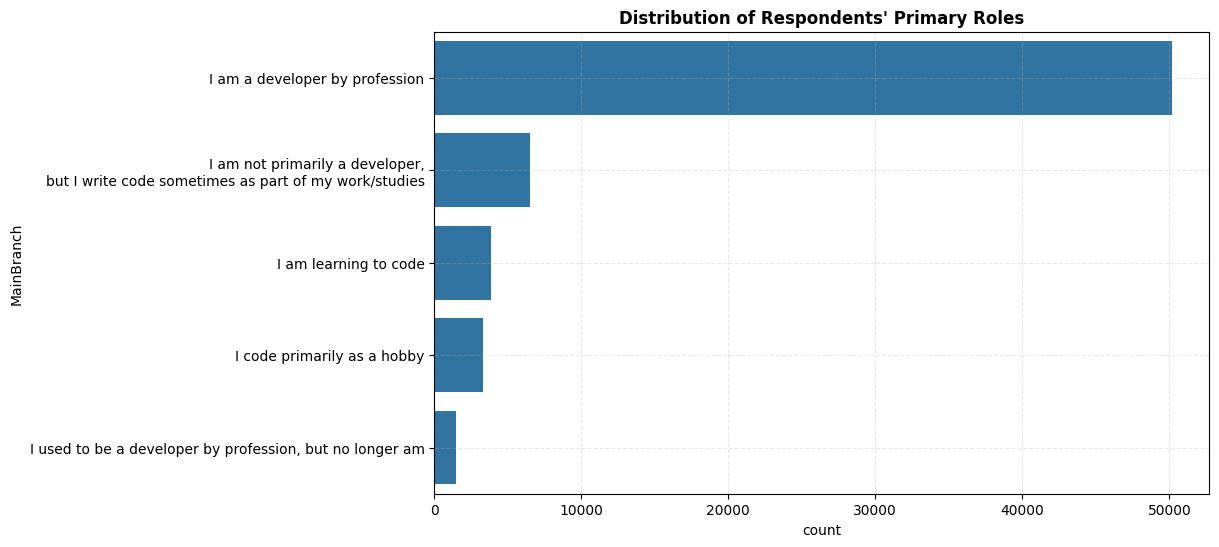

In [8]:
# Select Data
mb_data = df[['MainBranch']].dropna().copy()

# Count mainbranch 
mb_count = mb_data.value_counts().reset_index()

# Shorten MainBranch Values
shorten = {
    'I am not primarily a developer, but I write code sometimes as part of my work/studies' : 'I am not primarily a developer,\nbut I write code sometimes as part of my work/studies',
}

mb_count['MainBranch'] = mb_count['MainBranch'].replace(shorten)

# Bar Plot
plt.figure(figsize=(10,6))
sns.barplot(mb_count, x='count', y='MainBranch', color='tab:blue')

plt.title("Distribution of Respondents' Primary Roles", fontsize=12, weight='bold')
plt.grid(True, linestyle='--', alpha=0.3)

plt.show()

Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With

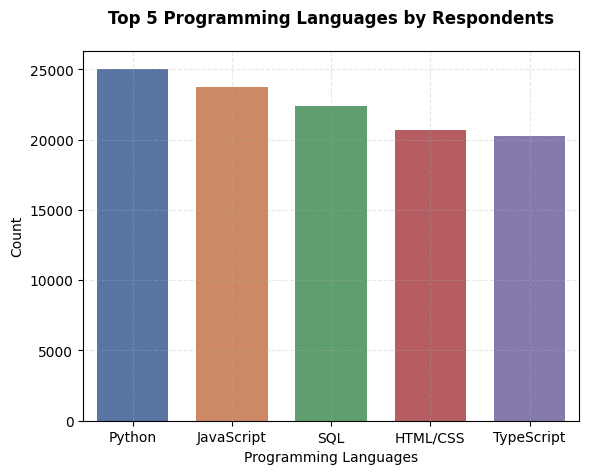

In [9]:
# Select Data
lang_data = df[['LanguageWantToWorkWith']].dropna().copy()

# Split Language Column
lang_data['Language'] = lang_data['LanguageWantToWorkWith'].str.split(';')
lang_explode = lang_data.explode('Language')

# Top 5 Language
top_lang = lang_explode['Language'].value_counts().nlargest(5).reset_index()

# Bar Chart
sns.barplot(top_lang, x='Language', y='count', palette='deep', hue='Language', gap=0.1)

plt.title("Top 5 Programming Languages by Respondents", fontsize=12, weight='bold', pad=20)
plt.xlabel("Programming Languages")
plt.ylabel("Count")
plt.grid(True, linestyle='--', alpha=0.3)

plt.show()

Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by `Age` Group

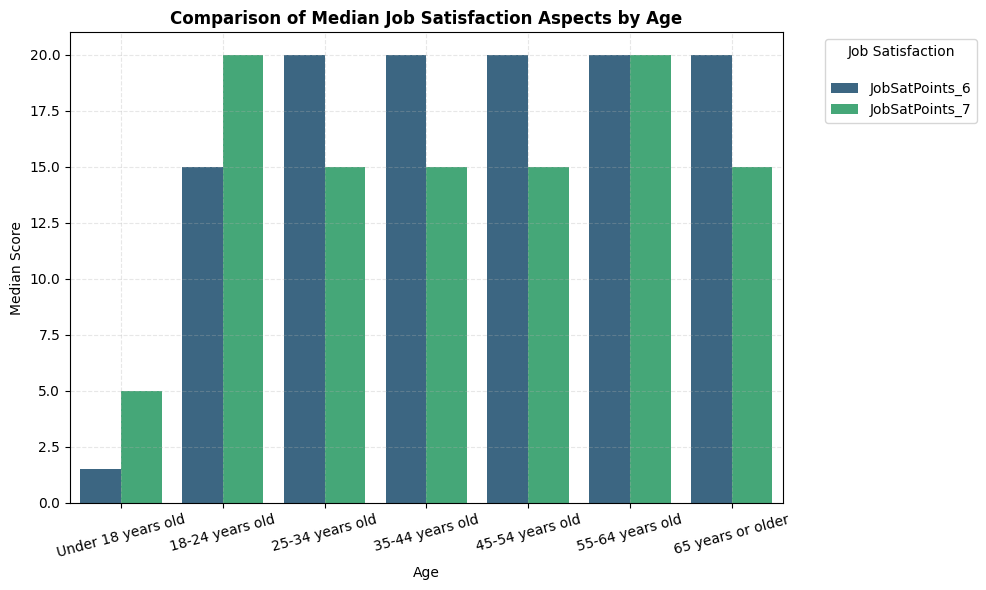

In [10]:
# Select Data
sat_data = df[['JobSatPoints_6', 'JobSatPoints_7', 'Age']].dropna().copy()

# Aggregate
grouped = sat_data.groupby('Age', observed=True)[['JobSatPoints_6', 'JobSatPoints_7']].median().reset_index()

# Reshape ("Melt") the Job Satisfaction Data
df_melt = grouped.melt(
    id_vars=['Age'],
    value_vars=['JobSatPoints_6', 'JobSatPoints_7'],
    var_name="Metric",
    value_name="Median Score"
)

# Grouped Bar Chart
plt.figure(figsize=(10,6))

sns.barplot(
    data=df_melt,
    x='Age',
    y='Median Score',
    hue='Metric',
    palette='viridis'
)

plt.title("Comparison of Median Job Satisfaction Aspects by Age", fontsize=12, weight='bold')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Job Satisfaction\n")
plt.xticks(rotation=15)
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)

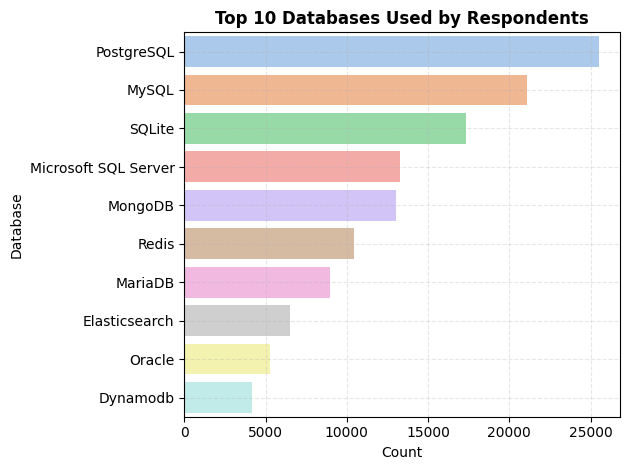

In [11]:
# Select Data
database_data = df[['DatabaseHaveWorkedWith']].dropna().copy()

# Split Database Column
database_data['Database'] = database_data['DatabaseHaveWorkedWith'].str.split(';')
db_explode = database_data.explode('Database')

# Top 10 Database
top_db = db_explode['Database'].value_counts().nlargest(10).reset_index()

# Bar Chart
sns.barplot(top_db, x="count", y="Database", hue='Database', 
            palette='pastel', linewidth=0.5)

plt.title("Top 10 Databases Used by Respondents", fontsize=12, weight='bold')
plt.xlabel("Count")
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

---

#### VISUALIZING COMPARISON OF DATA WITH BAR CHARTS

Grouped Bar Chart of Median `ConvertedCompYearly` for Different `Age` groups

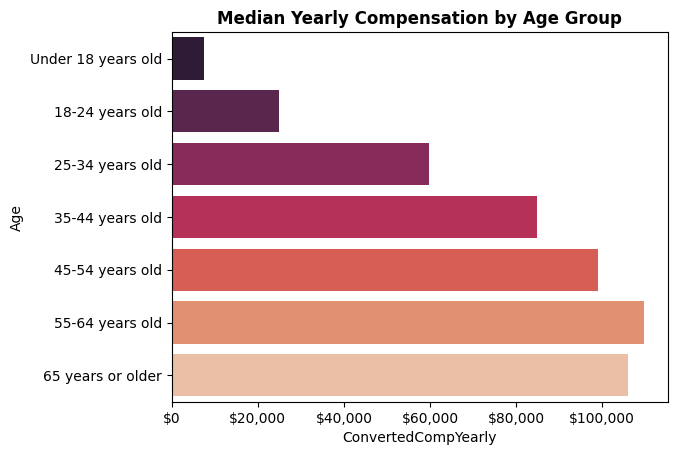

In [15]:
# Select Data
comp_age = df[['ConvertedCompYearly','Age', 'Num_Age']].dropna().copy()

# Aggregate
grouped = comp_age.groupby(['Age', 'Num_Age'], observed=True)['ConvertedCompYearly'].median().reset_index()

# Bar Chart (Grouped)
sns.barplot(grouped, y='Age', x='ConvertedCompYearly', hue='Age', palette='rocket')

plt.title("Median Yearly Compensation by Age Group", fontsize=12, weight='bold')

# set x axis ticks currency
plt.gca().xaxis.set_major_formatter(mticker.StrMethodFormatter("${x:,.0f}"))

plt.show()

Bar Chart of Respondent Count by `Country`

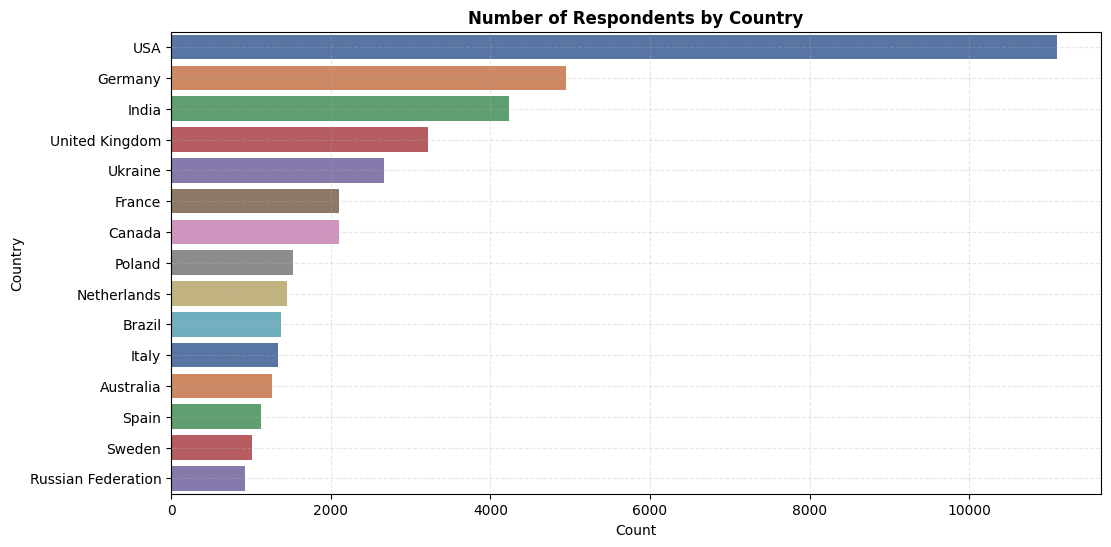

In [23]:
country_data = df[['Country']].dropna().copy()

# Shorten Country Name
country_name = {
    'United Kingdom of Great Britain and Northern Ireland': "United Kingdom",
    "United States of America" : "USA"
}

country_data['Country'] = country_data['Country'].replace(country_name)

# Pick top 15 country with most-respondents
country_count = country_data['Country'].value_counts().nlargest(15).reset_index()

# Bar Plot
plt.figure(figsize=(12,6))
sns.barplot(country_count, y='Country', x='count', hue='Country', palette='deep')

plt.title("Number of Respondents by Country", fontsize=12, weight='bold')
plt.xlabel("Count")
plt.grid(True, linestyle='--', alpha=0.3)

plt.show()

---

In [24]:
conn.close()

---

#### **Summary**

- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.